# Libraries

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

------------------------------------------
# Dataset

*Unduh file dari Google Drive ke Google Colab*

In [ ]:
!gdown --id 10ciJlTSJcwaYgTwxa_KTJDs8nIkTzDU6

Downloading...
From: https://drive.google.com/uc?id=10ciJlTSJcwaYgTwxa_KTJDs8nIkTzDU6
To: /content/mobil.xls
100% 29.2k/29.2k [00:00<00:00, 50.1MB/s]


*Membaca data berformat excel*

In [ ]:
def data_excel(data) :
  xls = pd.read_excel(data)
  return xls

*Menampilkan dataset*

In [ ]:
dataset = data_excel('mobil.xls')
dataset

,Nama Mobil,Ukuran,Kenyamanan,Irit,Kecepatan,Harga (Ratus Juta)
0,Toyota Agya,4,4,9,6,1.00
1,Daihatsu Alya,4,3,9,6,1.10
2,Toyota Avanza,6,5,6,6,2.00
3,Daihatsu Xenia,6,4,6,6,1.75
4,Xpander,7,7,6,7,2.25
5,Livina,7,7,6,7,2.10
6,Karimun,3,4,10,5,1.20
7,Toyota Innova,8,8,5,7,4.00
8,Alphard,9,10,4,8,10.00
9,Toyota Vios,5,7,9,8,2.50


------------------------------------------
# Data Preprocessing

*Ringkasan lengkap dari Data Frame*

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Nama Mobil          17 non-null     object 
 1   Ukuran              17 non-null     int64  
 2   Kenyamanan          17 non-null     int64  
 3   Irit                17 non-null     int64  
 4   Kecepatan           17 non-null     int64  
 5   Harga (Ratus Juta)  17 non-null     float64
dtypes: float64(1), int64(4), object(1)
memory usage: 944.0+ bytes


*Mengecek Missing Value pada data frame*

In [ ]:
dataset.isnull().sum()

Nama Mobil            0
Ukuran                0
Kenyamanan            0
Irit                  0
Kecepatan             0
Harga (Ratus Juta)    0
dtype: int64

*Menampilkan kolom-kolom pada Data Frame*

In [ ]:
dataset.columns

Index(['Nama Mobil', 'Ukuran', 'Kenyamanan', 'Irit', 'Kecepatan',
       'Harga (Ratus Juta)'],
      dtype='object')

*Rename kolom Harga (Ratus Juta)*

In [ ]:
data = dataset.rename({'Harga (Ratus Juta)':'Harga'}, axis=1)
data.iloc[:3]

,Nama Mobil,Ukuran,Kenyamanan,Irit,Kecepatan,Harga
0,Toyota Agya,4,4,9,6,1.0
1,Daihatsu Alya,4,3,9,6,1.1
2,Toyota Avanza,6,5,6,6,2.0


In [ ]:
type(data)

pandas.core.frame.DataFrame

*Mendeskripsikan semua kolom Data Frame*

In [ ]:
data.describe(include='all')

,Nama Mobil,Ukuran,Kenyamanan,Irit,Kecepatan,Harga
count,17,17.000000,17.000000,17.000000,17.000000,17.000000
unique,17,NaN,NaN,NaN,NaN,NaN
top,Livina,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN
mean,NaN,6.529412,6.352941,6.941176,6.823529,3.247059
std,NaN,2.034627,2.234423,1.784327,1.131111,2.406597
min,NaN,3.000000,3.000000,4.000000,5.000000,0.800000
25%,NaN,5.000000,4.000000,6.000000,6.000000,1.750000
50%,NaN,7.000000,7.000000,7.000000,7.000000,2.300000
75%,NaN,8.000000,8.000000,9.000000,8.000000,5.000000


--------------------------------------------------------------------------------
# Normalisasi Data

In [ ]:
train_mobil = data[['Kenyamanan','Harga']]

In [ ]:
def normalisasi(data) :
  return (data - data.min()) / (data.max() - data.min())

In [ ]:
normalisasi(train_mobil).head()

,Kenyamanan,Harga
0,0.142857,0.021739
1,0.000000,0.032609
2,0.285714,0.130435
3,0.142857,0.103261
4,0.571429,0.157609


------------------------------------------
# Metode

*Mengukur jarak tetangga dengan rumus Euclidean Distance*

In [ ]:
def euclidean(train_mobil, test_mobil) :
  euclid = []
  for i in range(len(train_mobil)) :
    euc = round(np.sqrt(((test_mobil[0] - train_mobil['Kenyamanan'][i])**2) + ((test_mobil[1] - train_mobil['Harga'][i])**2)), 2)
    euclid.append(euc)
  return euclid

*Mengukur jarak tetangga dengan rumus Manhattan Distance*

In [ ]:
def manhattan(train_mobil, test_mobil) :
  manhat = []
  for i in range(len(train_mobil)) :
    man = round((abs(test_mobil[0] - train_mobil['Kenyamanan'][i])) + (abs(test_mobil[1] - train_mobil['Harga'][i])), 2)
    manhat.append(man)
  return manhat 

*Mengukur jarak tetangga dengan rumus Minkowski Distance*

In [ ]:
def minkowski(train_mobil, test_mobil) :
  minkow = []
  for i in range(len(train_mobil)) :
    min = round(((abs(test_mobil[0] - train_mobil['Kenyamanan'][i])**3) + (abs(test_mobil[1] - train_mobil['Harga'][i]))**3)**(1.0/3), 2)
    minkow.append(min)
  return minkow 

*Mengukur jarak tetangga dengan rumus Supremum Distance*

In [ ]:
def supremum(train_mobil, test_mobil) :
  supre = []
  for i in range(len(train_mobil)) :
    sup1 = round((abs(test_mobil[0] - train_mobil['Kenyamanan'][i])), 2)
    sup2 = round((abs(test_mobil[1] - train_mobil['Harga'][i])), 2)
    max_sup = max(sup1, sup2)
    supre.append(max_sup)
  return supre 

*List Metode*

In [ ]:
methods = ['Euclidian', 'Manhattan', 'Minkowski', 'Supremum']

------------------------------------------
# Main Program

*- Input Data Mobil Baru -*

In [ ]:
print('\033[1m- Data Testing -\033[0m')
print('Nama Mobil : Mobil X')
kenyamanan = float(input('Kenyamanan : '))
harga = float(input('Harga      : '))

test_mobil = ([kenyamanan, harga])
# print('Data Mobil Baru :', test_mobil)

- Data Testing -
Nama Mobil : Mobil X
Kenyamanan : 5
Harga      : 2.5


***# Euclidean Result***

In [ ]:
print(euclidean(train_mobil, test_mobil))

[1.8, 2.44, 0.5, 1.25, 2.02, 2.04, 1.64, 3.35, 9.01, 2.0, 3.01, 2.5, 3.91, 5.0, 5.32, 2.01, 2.62]


In [ ]:
jarak_euc = euclidean(train_mobil, test_mobil)
data_euclid = data.copy()
data_euclid['Jarak Euclidean'] = jarak_euc
data_euc1 = data_euclid.sort_values('Jarak Euclidean')
data_euc = data_euc1.reset_index(drop=True)

In [ ]:
data_euc

,Nama Mobil,Ukuran,Kenyamanan,Irit,Kecepatan,Harga,Jarak Euclidean
0,Toyota Avanza,6,5,6,6,2.00,0.50
1,Daihatsu Xenia,6,4,6,6,1.75,1.25
2,Karimun,3,4,10,5,1.20,1.64
3,Toyota Agya,4,4,9,6,1.00,1.80
4,Toyota Vios,5,7,9,8,2.50,2.00
5,Suzuki Ertiga,7,7,7,7,2.30,2.01
6,Xpander,7,7,6,7,2.25,2.02
7,Livina,7,7,6,7,2.10,2.04
8,Daihatsu Alya,4,3,9,6,1.10,2.44
9,Toyota Hiace,10,5,8,6,5.00,2.50


***# Manhattan Result***

In [ ]:
print(manhattan(train_mobil, test_mobil))

[2.5, 3.4, 0.5, 1.75, 2.25, 2.4, 2.3, 4.5, 12.5, 2.0, 3.2, 2.5, 5.5, 7.0, 7.5, 2.2, 3.7]


In [ ]:
jarak_man = manhattan(train_mobil, test_mobil)
data_manhat = data.copy()
data_manhat['Jarak Manhattan'] = jarak_man
data_manhat.sort_values('Jarak Manhattan')
data_man1 = data_manhat.sort_values('Jarak Manhattan')
data_man = data_man1.reset_index(drop=True)

In [ ]:
data_man

,Nama Mobil,Ukuran,Kenyamanan,Irit,Kecepatan,Harga,Jarak Manhattan
0,Toyota Avanza,6,5,6,6,2.00,0.50
1,Daihatsu Xenia,6,4,6,6,1.75,1.75
2,Toyota Vios,5,7,9,8,2.50,2.00
3,Suzuki Ertiga,7,7,7,7,2.30,2.20
4,Xpander,7,7,6,7,2.25,2.25
5,Karimun,3,4,10,5,1.20,2.30
6,Livina,7,7,6,7,2.10,2.40
7,Toyota Agya,4,4,9,6,1.00,2.50
8,Toyota Hiace,10,5,8,6,5.00,2.50
9,Honda City,5,8,7,8,2.70,3.20


***# Minkowski Result***

In [ ]:
print(minkowski(train_mobil, test_mobil))

[1.64, 2.21, 0.5, 1.12, 2.0, 2.01, 1.47, 3.12, 8.18, 2.0, 3.0, 2.5, 3.49, 4.5, 4.75, 2.0, 2.35]


In [ ]:
jarak_min = minkowski(train_mobil, test_mobil)
data_minkow = data.copy()
data_minkow['Jarak Minkowski'] = jarak_min
data_minkow.sort_values('Jarak Minkowski')
data_min1 = data_minkow.sort_values('Jarak Minkowski')
data_min = data_min1.reset_index(drop=True)

In [ ]:
data_min

,Nama Mobil,Ukuran,Kenyamanan,Irit,Kecepatan,Harga,Jarak Minkowski
0,Toyota Avanza,6,5,6,6,2.00,0.50
1,Daihatsu Xenia,6,4,6,6,1.75,1.12
2,Karimun,3,4,10,5,1.20,1.47
3,Toyota Agya,4,4,9,6,1.00,1.64
4,Xpander,7,7,6,7,2.25,2.00
5,Toyota Vios,5,7,9,8,2.50,2.00
6,Suzuki Ertiga,7,7,7,7,2.30,2.00
7,Livina,7,7,6,7,2.10,2.01
8,Daihatsu Alya,4,3,9,6,1.10,2.21
9,Suzuki Carry,7,3,9,5,0.80,2.35


***# Supremum Result***

In [ ]:
print(supremum(train_mobil, test_mobil))

[1.5, 2.0, 0.5, 1.0, 2.0, 2.0, 1.3, 3.0, 7.5, 2.0, 3.0, 2.5, 3.0, 4.0, 4.0, 2.0, 2.0]


In [ ]:
jarak_sup = supremum(train_mobil, test_mobil)
data_supre = data.copy()
data_supre['Jarak Supremum'] = jarak_sup
data_supre.sort_values('Jarak Supremum')
data_sup1 = data_supre.sort_values('Jarak Supremum')
data_sup = data_sup1.reset_index(drop=True)

In [ ]:
data_sup

,Nama Mobil,Ukuran,Kenyamanan,Irit,Kecepatan,Harga,Jarak Supremum
0,Toyota Avanza,6,5,6,6,2.00,0.5
1,Daihatsu Xenia,6,4,6,6,1.75,1.0
2,Karimun,3,4,10,5,1.20,1.3
3,Toyota Agya,4,4,9,6,1.00,1.5
4,Toyota Vios,5,7,9,8,2.50,2.0
5,Suzuki Ertiga,7,7,7,7,2.30,2.0
6,Suzuki Carry,7,3,9,5,0.80,2.0
7,Xpander,7,7,6,7,2.25,2.0
8,Daihatsu Alya,4,3,9,6,1.10,2.0
9,Livina,7,7,6,7,2.10,2.0


--------------------------------------------------------------------------------
# ***3 Mobil dengan Rekomendasi Terbaik***



In [ ]:
print('\033[1m- Data Mobil X -\033[0m')
print('Kenyamanan'.ljust(10),':', kenyamanan)
print('Harga'.ljust(10),':', harga)

k = int(input('\nJumlah K = '))
for i in range(4) :
  print('\n\x1B[3m\033[1m# Jarak dengan Metode', methods[i], '\033[0m\x1B[0m')
  if i == 0 :
    for j in range(k) :
      print(data_euc['Nama Mobil'][j].ljust(20),':', data_euc['Jarak Euclidean'][j])
  elif i == 1 :
    for j in range(k) :
      print(data_man['Nama Mobil'][j].ljust(20),':', data_man['Jarak Manhattan'][j])
  elif i == 2 :
    for j in range(k) :
      print(data_min['Nama Mobil'][j].ljust(20),':', data_min['Jarak Minkowski'][j])
  elif i == 3 :
    for j in range(k) :
      print(data_sup['Nama Mobil'][j].ljust(20),':', data_sup['Jarak Supremum'][j])

- Data Mobil X -
Kenyamanan : 5.0
Harga      : 2.5

Jumlah K = 3

# Jarak dengan Metode Euclidian 
Toyota Avanza        : 0.5
Daihatsu Xenia       : 1.25
Karimun              : 1.64

# Jarak dengan Metode Manhattan 
Toyota Avanza        : 0.5
Daihatsu Xenia       : 1.75
Toyota Vios          : 2.0

# Jarak dengan Metode Minkowski 
Toyota Avanza        : 0.5
Daihatsu Xenia       : 1.12
Karimun              : 1.47

# Jarak dengan Metode Supremum 
Toyota Avanza        : 0.5
Daihatsu Xenia       : 1.0
Karimun              : 1.3


***Konversi data rekomendasi ke file excel***

In [ ]:
rek_euc = data_euc[['Nama Mobil','Jarak Euclidean']].iloc[:3]
rek_man = data_man[['Nama Mobil','Jarak Manhattan']].iloc[:3]
rek_min = data_min[['Nama Mobil','Jarak Minkowski']].iloc[:3]
rek_sup = data_sup[['Nama Mobil','Jarak Supremum']].iloc[:3]
rekomendasi = [rek_euc, rek_man, rek_min, rek_sup]

In [ ]:
for i in range(len(rekomendasi)) :
  rekomendasi[i].to_excel(f'rekomendasi_{methods[i]}.xls')

← File excel-nya bisa dilihat di sini ('Files' di Google Colab)

## ** testing grafik*

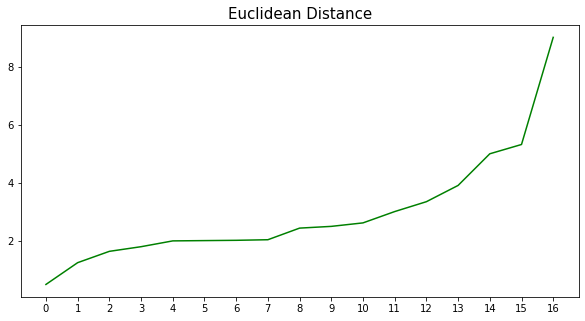

In [ ]:
x1 = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16]
y1 = []
for i in range(len(data_euc)) :
  y1.append(data_euc['Jarak Euclidean'][i])

plt.figure(figsize = (10,5))
plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16],)
plt.title("Euclidean Distance", fontsize=15)

plt.plot(x1, y1, color= 'green')

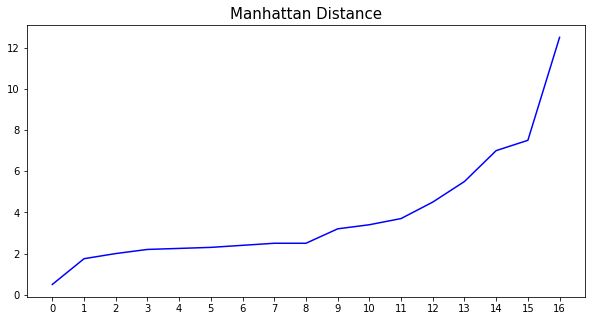

In [ ]:
x2 = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16]
y2 = []
for i in range(len(data_man)) :
  y2.append(data_man['Jarak Manhattan'][i])

plt.figure(figsize = (10,5))
plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16],)
plt.title("Manhattan Distance", fontsize=15)

plt.plot(x2, y2, color= 'Blue')

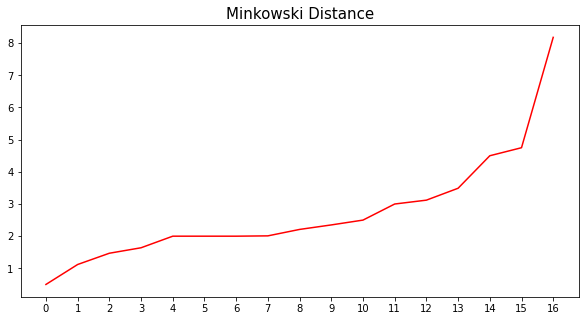

In [ ]:
x3 = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16]
y3 = []
for i in range(len(data_min)) :
  y3.append(data_min['Jarak Minkowski'][i])

plt.figure(figsize = (10,5))
plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16],)
plt.title("Minkowski Distance", fontsize=15)

plt.plot(x3, y3, color= 'red')

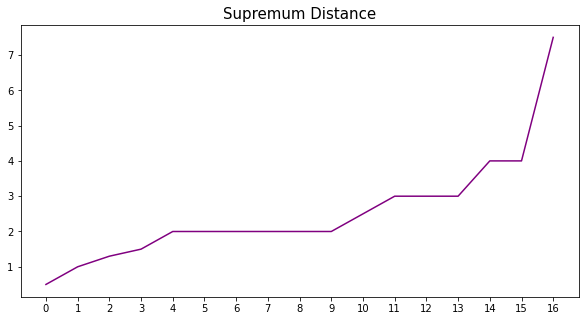

In [ ]:
x4 = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16]
y4 = []
for i in range(len(data_sup)) :
  y4.append(data_sup['Jarak Supremum'][i])

plt.figure(figsize = (10,5))
plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16],)
plt.title("Supremum Distance", fontsize=15)

plt.plot(x4, y4, color= 'purple')